# Статистический анализ


Для анализа возьмет выборку из общего датасета вакансий с указанной заработной платой и категоризацией по Отраслям работы. 

## Подгрузка данных в питон и начало работы с ними

**Подключение библиотек**

In [ ]:
!pip install numpy 
!pip install sklearn
!pip install scipy

ERROR: Could not find a version that satisfies the requirement sklearn.linear_model (from versions: none)
ERROR: No matching distribution found for sklearn.linear_model


In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import scipy
import scipy.stats as stats
import seaborn as sns
#import sklearn.linear_model as lm
import ast #для literal_eval

pd.options.display.max_rows = 8

C:\Users\maria\AppData\Local\Temp\ipykernel_28196\3258707229.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [7]:
df_new_2 = pd.read_excel(r'C:\Users\maria\my_projects_repository\Data_analytics_TSU\clean_dataset.xlsx') # датасет из исходного но после предобработки на этапе EDA

Анализ загруженной информации, просмотр типов данных, оценка наличия пустых записей, проверка на дубликаты

In [8]:
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33243 entries, 0 to 33242
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          33243 non-null  int64  
 1   id                  33243 non-null  int64  
 2   name                33243 non-null  object 
 3   salary              33243 non-null  object 
 4   type                33243 non-null  object 
 5   archived            33243 non-null  bool   
 6   employer            33243 non-null  object 
 7   snippet             33243 non-null  object 
 8   contacts            21578 non-null  object 
 9   schedule            33243 non-null  object 
 10  description         33243 non-null  object 
 11  experience          33243 non-null  object 
 12  key_skills          33243 non-null  object 
 13  specializations     33243 non-null  object 
 14  region              33243 non-null  object 
 15  specialization_new  33243 non-null  object 
 16  prof

**ВЫВОД** - в данных содержится 33243 записи

In [9]:
df_new_2.drop(columns = ['Unnamed: 0'],axis = 1, inplace=True)

In [10]:
df_new_2['unif_name'].value_counts()

unif_name
Информационные технологии               18712
Недвижимость                             5245
Работа с кадрами                         5201
Маркетинг, Реклама, PR                   1094
Высший менеджмент                         274
Производство, Сервисное обслуживание        9
Name: count, dtype: int64

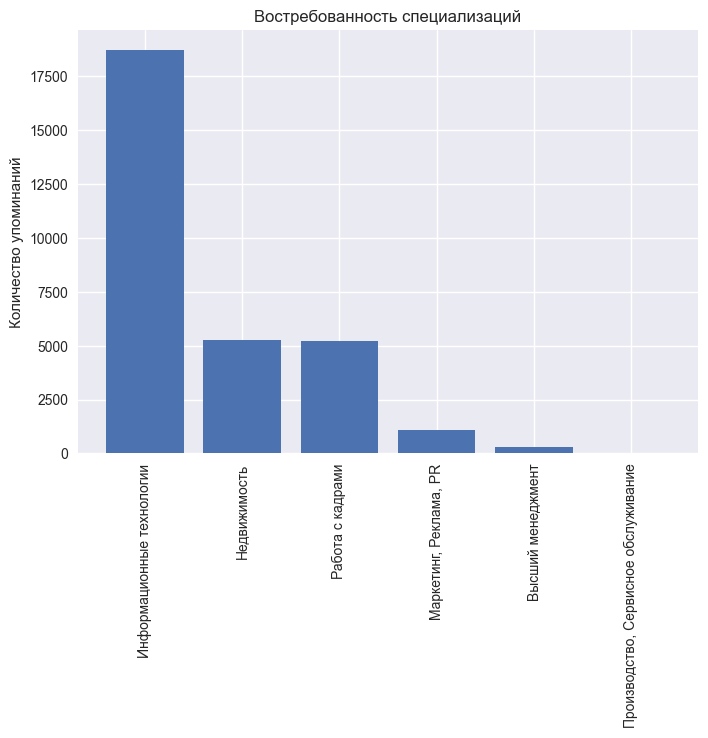

In [11]:
name_counts_TOP = df_new_2['unif_name'].value_counts()
plt.title('Востребованность специализаций')
plt.ylabel('Количество упоминаний')
plt.bar(name_counts_TOP.index, name_counts_TOP.values)
plt.xticks(rotation=90)
plt.show()

Как видим, отрасль Информационых технологий все таки является Очень сильно лидирующей. Для целей нашего анализа это имеет большое значение. 

Медианные значения минимальной заработной платы. 

In [12]:
df_new_2.groupby('unif_name')["min_salary"].median()

unif_name
Высший менеджмент                       109195.5
Информационные технологии                68966.0
Маркетинг, Реклама, PR                   45977.0
Недвижимость                             80460.0
Производство, Сервисное обслуживание     40230.0
Работа с кадрами                         45977.0
Name: min_salary, dtype: float64

Медианные значения максимальной заработной платы. 

In [13]:
df_new_2.groupby('unif_name')["max_salary"].median()

unif_name
Высший менеджмент                       126437.0
Информационные технологии                95000.0
Маркетинг, Реклама, PR                   57471.0
Недвижимость                            229885.0
Производство, Сервисное обслуживание     63218.0
Работа с кадрами                         57471.0
Name: max_salary, dtype: float64

Статистическое описание

In [14]:
df_new_2.groupby('unif_name')["min_salary"].describe() #миниальная зарплата

,count,mean,std,min,25%,50%,75%,max
unif_name,,,,,,,,
Высший менеджмент,274.0,128774.956204,75702.114880,23000.0,74713.0,109195.5,172414.0,400000.0
Информационные технологии,18712.0,88187.312687,65664.909406,11494.0,40230.0,68966.0,114943.0,402299.0
"Маркетинг, Реклама, PR",1094.0,54704.518282,40941.437897,11494.0,32184.0,45977.0,60000.0,402299.0
Недвижимость,5245.0,101686.202288,67070.483343,11494.0,57471.0,80460.0,114943.0,402299.0
"Производство, Сервисное обслуживание",9.0,43141.222222,12692.001278,28500.0,34483.0,40230.0,45977.0,68966.0
Работа с кадрами,5201.0,52612.559508,29168.786553,10345.0,34483.0,45977.0,60000.0,350000.0


In [15]:
df_new_2.groupby('unif_name')["max_salary"].describe() #максимальная зарплата

,count,mean,std,min,25%,50%,75%,max
unif_name,,,,,,,,
Высший менеджмент,109.0,165877.311927,105197.040664,26500.0,97701.0,126437.0,206897.0,520000.0
Информационные технологии,8713.0,132018.091817,103447.678066,13000.0,57471.0,95000.0,172414.0,2000000.0
"Маркетинг, Реклама, PR",561.0,75256.800357,62223.859378,13793.0,43678.0,57471.0,91954.0,689655.0
Недвижимость,2525.0,286633.645545,362432.048414,22989.0,137931.0,229885.0,344828.0,11494253.0
"Производство, Сервисное обслуживание",5.0,96551.600000,75962.192331,45977.0,57471.0,63218.0,86207.0,229885.0
Работа с кадрами,2621.0,67116.506295,41017.912990,14000.0,42529.0,57471.0,80460.0,689655.0


В столбце с максимальной зарплатой значений занесено меньше. 

## Гипотезы

- Наиболее оплачиваемые вакансии это программист/разработчик
- Уровень заработной платы зависит от наличия навыков владения 1C
- Уровень заработной платы зависит от опыта работы
- Наиболее востребованные навыки связаны с базами данных и SQL

## Структурированные данные для проверки Гипотезы 1

In [16]:
df = df_new_2.copy() # внутренний датафрейм. его и буду обрабатывать
df

,id,name,salary,type,archived,employer,snippet,contacts,schedule,description,...,key_skills,specializations,region,specialization_new,prof_area,skill_new,min_salary,max_salary,currency_salary,unif_name
0,54653519,Тестировщик.Net,"{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '1245158', 'name': 'МФК Саммит', 'url':...",{'requirement': 'Мы ищем талантливого и амбици...,"{'name': 'Синанова Мария', 'email': 'sinanova....","{'id': 'fullDay', 'name': 'Полный день'}",<p><em><strong>Мы ищем талантливого и амбициоз...,...,"[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,"['Программирование, Разработка', 'Инженер', 'Т...","['Информационные технологии, интернет, телеком...","['Git', 'SQL', 'Тестирование', 'C#', 'API']",25000,50000.0,RUR,Информационные технологии
1,54031261,Ведущий Специалист по информационным технологиям,"{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '4352', 'name': 'Почта России', 'url': ...",{'requirement': 'Средне-профессиональное или в...,"{'name': 'Данилова Екатерина Александровна', '...","{'id': 'fullDay', 'name': 'Полный день'}",<ul> <li>Администрирование компьютерной сети</...,...,"[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Информационные технологии, интернет, телеком...","['Пользователь ПК', 'Работа в команде', '1С: П...",26000,NaN,RUR,Информационные технологии
2,55243040,Специалист по защите информации,"{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '6694236', 'name': 'ГБПОУ АО Астраханск...","{'requirement': 'Медицинская комиссия, справка...","{'name': 'Трубицына Елена', 'email': 'info@ast...","{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Обеспеч...,...,"[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Информационные технологии, интернет, телеком...","['MS Dos', 'Диагностика ПК', 'Компьютер', 'Раб...",22989,22989.0,RUR,Информационные технологии
3,53306822,Специалист по защите информации,"{'from': 15000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '3367212', 'name': 'Отдел мобилизационн...",{'requirement': 'Наличие высшего образования п...,"{'name': 'Типаков Дмитрий Александрович', 'ema...","{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Выполне...,...,[],"[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Информационные технологии, интернет, телеком...",[],17241,22989.0,RUR,Информационные технологии
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33239,55907132,Программист (удаленно),"{'from': 20000, 'to': 300000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '1451533', 'name': 'Горизонт', 'url': '...","{'requirement': 'Уверенный английский, достато...","{'name': 'Шевелев Максим', 'email': 'maxi.shev...","{'id': 'remote', 'name': 'Удаленная работа'}","<p><strong>Программист - удаленная работа, воз...",...,"[{'name': 'JavaScript'}, {'name': 'Git'}, {'na...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,"['Программирование, Разработка', 'Системы упра...","['Информационные технологии, интернет, телеком...","['JavaScript', 'Git', 'Python', 'PHP', 'ООП', ...",20000,300000.0,RUR,Информационные технологии
33240,66113885,Программист 1C,"{'from': 130000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '97966', 'name': 'Окраина', 'url': 'htt...",{'requirement': 'Доброжелательность и отзывчив...,"{'name': 'Буланки

Оставим только данные из Отрасли (unif_name) Информационные технологии

In [17]:
filter = df['unif_name'] == 'Информационные технологии'
df = df[filter]
df

,id,name,salary,type,archived,employer,snippet,contacts,schedule,description,...,key_skills,specializations,region,specialization_new,prof_area,skill_new,min_salary,max_salary,currency_salary,unif_name
0,54653519,Тестировщик.Net,"{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '1245158', 'name': 'МФК Саммит', 'url':...",{'requirement': 'Мы ищем талантливого и амбици...,"{'name': 'Синанова Мария', 'email': 'sinanova....","{'id': 'fullDay', 'name': 'Полный день'}",<p><em><strong>Мы ищем талантливого и амбициоз...,...,"[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,"['Программирование, Разработка', 'Инженер', 'Т...","['Информационные технологии, интернет, телеком...","['Git', 'SQL', 'Тестирование', 'C#', 'API']",25000,50000.0,RUR,Информационные технологии
1,54031261,Ведущий Специалист по информационным технологиям,"{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '4352', 'name': 'Почта России', 'url': ...",{'requirement': 'Средне-профессиональное или в...,"{'name': 'Данилова Екатерина Александровна', '...","{'id': 'fullDay', 'name': 'Полный день'}",<ul> <li>Администрирование компьютерной сети</...,...,"[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Информационные технологии, интернет, телеком...","['Пользователь ПК', 'Работа в команде', '1С: П...",26000,NaN,RUR,Информационные технологии
2,55243040,Специалист по защите информации,"{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '6694236', 'name': 'ГБПОУ АО Астраханск...","{'requirement': 'Медицинская комиссия, справка...","{'name': 'Трубицына Елена', 'email': 'info@ast...","{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Обеспеч...,...,"[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Информационные технологии, интернет, телеком...","['MS Dos', 'Диагностика ПК', 'Компьютер', 'Раб...",22989,22989.0,RUR,Информационные технологии
3,53306822,Специалист по защите информации,"{'from': 15000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '3367212', 'name': 'Отдел мобилизационн...",{'requirement': 'Наличие высшего образования п...,"{'name': 'Типаков Дмитрий Александрович', 'ema...","{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Выполне...,...,[],"[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Информационные технологии, интернет, телеком...",[],17241,22989.0,RUR,Информационные технологии
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33237,55904184,"Веб-программист (PHP, Битрикс)","{'from': 70000, 'to': 130000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '224897', 'name': 'Максимастер', 'url':...",{'requirement': 'Уверенное владение 1C-Битрикс...,"{'name': 'Долинский Александр', 'email': 'jobs...","{'id': 'fullDay', 'name': 'Полный день'}",<p><strong>Чего мы ожидаем от кандидата:</stro...,...,"[{'name': 'PHP'}, {'name': 'HTML'}, {'name': '...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,"['Программирование, Разработка', 'Системы упра...","['Информационные технологии, интернет, телеком...","['PHP', 'HTML', 'JavaScript', 'MySQL', 'CSS', ...",70000,130000.0,RUR,Информационные технологии
33238,55904191,"Ведущий веб-программист (PHP, Битрикс)","{'from': 130000, 'to': 200000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '224897', 'name': 'Максимастер', 'url':...",{'requirement': 'Уверенное владение всем

Проверим, что остались данные с заполненной минимальной зарплатой и она выше 0

In [18]:
df= df.dropna(axis = 0, subset=['min_salary'])
filter = df['min_salary'] > 0
df = df[filter]
df

,id,name,salary,type,archived,employer,snippet,contacts,schedule,description,...,key_skills,specializations,region,specialization_new,prof_area,skill_new,min_salary,max_salary,currency_salary,unif_name
0,54653519,Тестировщик.Net,"{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '1245158', 'name': 'МФК Саммит', 'url':...",{'requirement': 'Мы ищем талантливого и амбици...,"{'name': 'Синанова Мария', 'email': 'sinanova....","{'id': 'fullDay', 'name': 'Полный день'}",<p><em><strong>Мы ищем талантливого и амбициоз...,...,"[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,"['Программирование, Разработка', 'Инженер', 'Т...","['Информационные технологии, интернет, телеком...","['Git', 'SQL', 'Тестирование', 'C#', 'API']",25000,50000.0,RUR,Информационные технологии
1,54031261,Ведущий Специалист по информационным технологиям,"{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '4352', 'name': 'Почта России', 'url': ...",{'requirement': 'Средне-профессиональное или в...,"{'name': 'Данилова Екатерина Александровна', '...","{'id': 'fullDay', 'name': 'Полный день'}",<ul> <li>Администрирование компьютерной сети</...,...,"[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Информационные технологии, интернет, телеком...","['Пользователь ПК', 'Работа в команде', '1С: П...",26000,NaN,RUR,Информационные технологии
2,55243040,Специалист по защите информации,"{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '6694236', 'name': 'ГБПОУ АО Астраханск...","{'requirement': 'Медицинская комиссия, справка...","{'name': 'Трубицына Елена', 'email': 'info@ast...","{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Обеспеч...,...,"[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Информационные технологии, интернет, телеком...","['MS Dos', 'Диагностика ПК', 'Компьютер', 'Раб...",22989,22989.0,RUR,Информационные технологии
3,53306822,Специалист по защите информации,"{'from': 15000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '3367212', 'name': 'Отдел мобилизационн...",{'requirement': 'Наличие высшего образования п...,"{'name': 'Типаков Дмитрий Александрович', 'ema...","{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Выполне...,...,[],"[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Информационные технологии, интернет, телеком...",[],17241,22989.0,RUR,Информационные технологии
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33237,55904184,"Веб-программист (PHP, Битрикс)","{'from': 70000, 'to': 130000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '224897', 'name': 'Максимастер', 'url':...",{'requirement': 'Уверенное владение 1C-Битрикс...,"{'name': 'Долинский Александр', 'email': 'jobs...","{'id': 'fullDay', 'name': 'Полный день'}",<p><strong>Чего мы ожидаем от кандидата:</stro...,...,"[{'name': 'PHP'}, {'name': 'HTML'}, {'name': '...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,"['Программирование, Разработка', 'Системы упра...","['Информационные технологии, интернет, телеком...","['PHP', 'HTML', 'JavaScript', 'MySQL', 'CSS', ...",70000,130000.0,RUR,Информационные технологии
33238,55904191,"Ведущий веб-программист (PHP, Битрикс)","{'from': 130000, 'to': 200000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '224897', 'name': 'Максимастер', 'url':...",{'requirement': 'Уверенное владение всем

<Axes: >

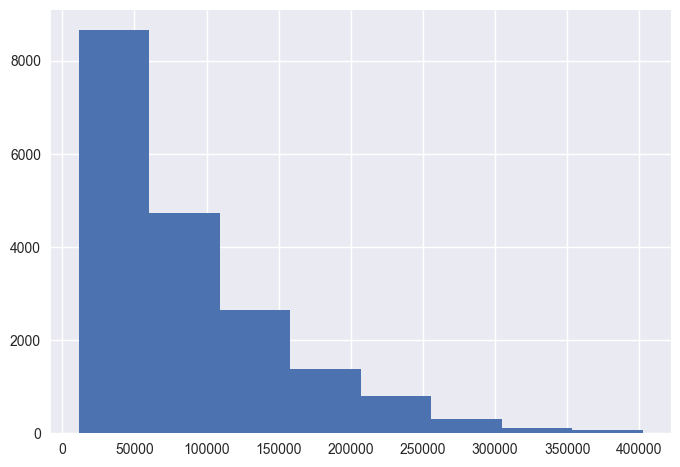

In [19]:
df['min_salary'].hist(bins=8)

Для чистоты оставим только данные с заполненным полем максимальной зарплаты

In [20]:
df= df.dropna(axis = 0, subset=['max_salary'])
df

,id,name,salary,type,archived,employer,snippet,contacts,schedule,description,...,key_skills,specializations,region,specialization_new,prof_area,skill_new,min_salary,max_salary,currency_salary,unif_name
0,54653519,Тестировщик.Net,"{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '1245158', 'name': 'МФК Саммит', 'url':...",{'requirement': 'Мы ищем талантливого и амбици...,"{'name': 'Синанова Мария', 'email': 'sinanova....","{'id': 'fullDay', 'name': 'Полный день'}",<p><em><strong>Мы ищем талантливого и амбициоз...,...,"[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,"['Программирование, Разработка', 'Инженер', 'Т...","['Информационные технологии, интернет, телеком...","['Git', 'SQL', 'Тестирование', 'C#', 'API']",25000,50000.0,RUR,Информационные технологии
2,55243040,Специалист по защите информации,"{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '6694236', 'name': 'ГБПОУ АО Астраханск...","{'requirement': 'Медицинская комиссия, справка...","{'name': 'Трубицына Елена', 'email': 'info@ast...","{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Обеспеч...,...,"[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Информационные технологии, интернет, телеком...","['MS Dos', 'Диагностика ПК', 'Компьютер', 'Раб...",22989,22989.0,RUR,Информационные технологии
3,53306822,Специалист по защите информации,"{'from': 15000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '3367212', 'name': 'Отдел мобилизационн...",{'requirement': 'Наличие высшего образования п...,"{'name': 'Типаков Дмитрий Александрович', 'ema...","{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Выполне...,...,[],"[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Информационные технологии, интернет, телеком...",[],17241,22989.0,RUR,Информационные технологии
4,55356367,Специалист по защите информации,"{'from': 27000, 'to': 27000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '1184735', 'name': 'Астраханьстат', 'ur...",{'requirement': 'Высшее образование по направл...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Проведе...,...,"[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,"['Компьютерная безопасность', 'Сетевые техноло...","['Информационные технологии, интернет, телеком...","['Пользователь ПК', 'Работа в команде', 'Грамо...",27000,27000.0,RUR,Информационные технологии
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33235,55895724,Инженер-программист,"{'from': 48000, 'to': 53000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '5711647', 'name': 'Бастион', 'url': 'h...",{'requirement': 'Высшее образование. Опыт рабо...,"{'name': 'Козлова Виктория Юрьевна', 'email': ...","{'id': 'fullDay', 'name': 'Полный день'}",<p><strong>ООО &quot;Бастион&quot; является пр...,...,"[{'name': 'оформление документации'}, {'name':...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,"['Программирование, Разработка', 'Системы упра...","['Информационные технологии, интернет, телеком...","['оформление документации', '1C: Предприятие',...",48000,53000.0,RUR,Информационные технологии
33237,55904184,"Веб-программист (PHP, Битрикс)","{'from': 70000, 'to': 130000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",False,"{'id': '224897', 'name': 'Максимастер', 'url':...",{'requirement': 'Уверенное владение 1C-Битрикс...,"{'name': 'Долинский Александр', 'email': 'jobs...","{'id': 'fullDay', 'n

## Выбранный метод анализа

Для анализа необходимо категоризовать датафрейм на программистов и нет.

Разделим вакансии на категории : 


*   1 - программист/разработчик
*   0 - другие вакансии




In [21]:
df['new_name'] = 0
df.loc[df['name'].astype(str).str.contains('программист|разработчик|Программист|Разработчик|ПРОГРАММИСТ', case = False), 'new_name'] = 1

C:\Users\maria\AppData\Local\Temp\ipykernel_28196\3958645029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_name'] = 0


In [22]:
df['new_name'].value_counts()

new_name
0    6200
1    2513
Name: count, dtype: int64

Произошло разделение. 
6200 вакансий не из разряда Программистов,
2513 - программист в любых системах

### Типы данных

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8713 entries, 0 to 33239
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8713 non-null   int64  
 1   name                8713 non-null   object 
 2   salary              8713 non-null   object 
 3   type                8713 non-null   object 
 4   archived            8713 non-null   bool   
 5   employer            8713 non-null   object 
 6   snippet             8713 non-null   object 
 7   contacts            5324 non-null   object 
 8   schedule            8713 non-null   object 
 9   description         8713 non-null   object 
 10  experience          8713 non-null   object 
 11  key_skills          8713 non-null   object 
 12  specializations     8713 non-null   object 
 13  region              8713 non-null   object 
 14  specialization_new  8713 non-null   object 
 15  prof_area           8713 non-null   object 
 16  skill_new 

Как видим, типы данных в датасете в основном object(строковые). 

*   Поле new_name - категориальные данные(номинальные, классификационные) . 
*   К числовым данным относятся только данные о минимальной и максимальной заработной плате (min_salary и max_salary). 
*   Идентификатор записи id - порядковый тип данных.

### Описательные статистики

In [24]:
df.drop(['id','new_name'],axis=1).describe()

,min_salary,max_salary
count,8713.000000,8.713000e+03
mean,87883.622059,1.320181e+05
std,64092.805029,1.034477e+05
min,11494.000000,1.300000e+04
25%,42000.000000,5.747100e+04
50%,68966.000000,9.500000e+04
75%,114943.000000,1.724140e+05
max,402299.000000,2.000000e+06


Для количественных данных по зарплатам отобразили основные статистические показатели.

In [25]:
df[['min_salary','max_salary']].mean() # среднее значение

min_salary     87883.622059
max_salary    132018.091817
dtype: float64

In [26]:
df[['min_salary','max_salary']].std()  # средне квадратическое отклонение

min_salary     64092.805029
max_salary    103447.678066
dtype: float64

### Проверка нормальности по критерию Шапиро-Уилка

Поскольку строк более 5000, то проверить данные на  нормальный закон распределения о Шапиро-Уилка нельзя. Вылетает ошибка расчета p-value.


In [27]:
stats.shapiro(df['max_salary'])

c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8141322135925293, pvalue=0.0)

Поскольку мы не можем посмотреть на нормальность данных, то 
применим проверку по коэффициаентам эксцесса и ассиметрии.

In [28]:
df[['min_salary','max_salary']].skew() # коэффициент асимметрии

min_salary    1.675296
max_salary    2.311564
dtype: float64

Поскольку коэффициенты ассиметрии больше 0, для обоих количественных наборов, то значит правый хвост распределения величины длиннее левого

In [29]:
df[['min_salary','max_salary']].kurtosis() # коэффициент эксцесса

min_salary     3.213516
max_salary    16.120920
dtype: float64

Коэффициенты эксцесса для обоих количественных величин больше 0, следовательно имеем островершинное распределение данных

Итак, наши количественные данные не подчиняются нормальному закону распределения.

## Проверка гипотезы 1. Анализ влияния категориальных признаков( по критерию Манна-Уитни)

Наша нулева гипотеза заключается в том, что вакансия программист в оплате равна всем остальным.

У нас две группы (программисты и нет, При этом между собой эти группы независимые. 
Проверять гипотезу 1 будем путем **Анализа влияния категориальных признаков.** по **критерию Манна-Уитни**. 

### Результат реализации метода

In [30]:
df.groupby('new_name')[['min_salary']].mean()

,min_salary
new_name,
0,80301.823065
1,106589.214485


Видим, что средняя **минимальная** зарплата для Программистов выше. чем для всех остальных профессий

In [31]:
df.groupby('new_name')[['max_salary']].mean()

,max_salary
new_name,
0,118796.528871
1,164637.944688


Видим, что средняя **максимальная** зарплата для Программистов выше, чем для всех остальных профессий

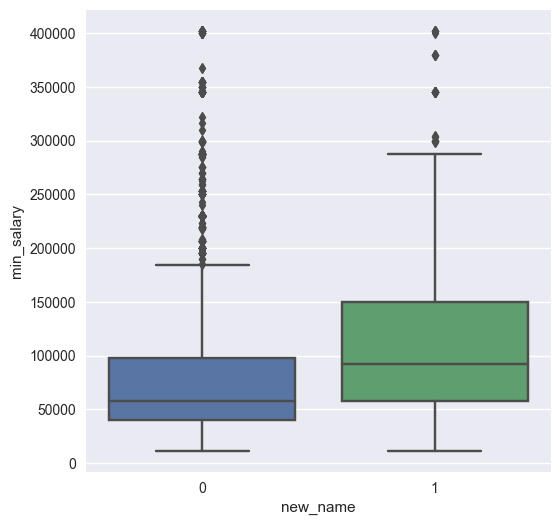

In [32]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='new_name', y='min_salary', data=df)

По графику визуально отмечается преимущество в оплате у категории 1 (программисты)

Проверим Гипотезу по критерию Манна-Уитни

In [33]:
df_0 = df[df['new_name']==0]
df_1 = df[df['new_name']==1]
scipy.stats.mannwhitneyu(df_0['min_salary'],df_1['min_salary'])

MannwhitneyuResult(statistic=5315504.0, pvalue=7.545478240338836e-120)

In [34]:
scipy.stats.mannwhitneyu(df_0['max_salary'],df_1['max_salary'])

MannwhitneyuResult(statistic=4877237.5, pvalue=3.143237257134844e-165)

Результаты коэффициентов p-value и для минимальной и для максимальной заработной платы для категорий 1/0 показывают, что они много выше 0.05 и нулевая гипотеза отклоняется.

### Вывод

В результате Нулевая Гипотеза о том, что нет разницы Программист в Информацинных технологиях и Иная профессия, и они равны по оплате -  отклоняется. 
Гипотеза о том, что Программисты/Разработчики являются наиболее высокооплачиваемыеми профессиями ПОДТВЕРЖДЕНА по критерию Манна-Уитни как по минимальной так и по максимальной зарплате.

**На замечание о том, что в п.5 рассмотрен частично**: Я не понимаю, как можно применить Корреляционные анализ для количественных данных минимальная и максимальная зарплата,кроме как между собой, но в этом нет смысла для моей гипотезы об оплате программистам??? 

In [35]:
scipy.stats.pearsonr(df.max_salary, df.min_salary)

PearsonRResult(statistic=0.8722157587207978, pvalue=0.0)

Исходя из полученных данных по коэффициенту корреляции Пирсона для максимальной и минимальной заработной платы, мы видим, что существует сильная(тесная) прямая связь (коэффициент 0.8722157587207953 > 0,7) - то есть рост минимальной зарплаты вызывет рост максимальной. 

При этом p-value =0 . Учитывая, что нулевые гипотезы ставим об отсутствии связи и т.д. я должна сделать вывод о том, что 0 < 0.05 , а значит нулевая гипотеза подтверждается, и корреляционной связи между минимальной и максимальной зарплатой нет. 